# Estimação por Máxima Verossimilhança (Maximum Likelihood Estimation - MLE)

A MLE é um método fundamental para estimar os parâmetros de um modelo estatístico. A ideia central é: dados os nossos dados observados, quais são os valores dos parâmetros do modelo que tornam a observação desses dados **o mais provável possível**?

Em outras palavras, maximizamos a **função de verossimilhança**.

### Exemplo Prático: Ajustando uma Distribuição Normal

Vamos supor que temos uma amostra de dados e acreditamos que eles vieram de uma distribuição normal (Gaussiana). Uma distribuição normal é definida por dois parâmetros: a média ($\mu$) e o desvio padrão ($\sigma$).

Usaremos a MLE para encontrar os melhores valores de $\mu$ e $\sigma$ que se ajustam aos nossos dados.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# 1. Gerar dados de uma distribuição normal com parâmetros conhecidos
true_mu = 10
true_sigma = 2
sample_size = 1000

np.random.seed(42)
dados = np.random.normal(true_mu, true_sigma, sample_size)

In [3]:
# 2. Usar MLE para estimar os parâmetros a partir dos dados
# A função `norm.fit` do SciPy usa MLE por padrão
mu_estimado, sigma_estimado = norm.fit(dados)

print("Parâmetros Reais:")
print(f"Média (μ): {true_mu}")
print(f"Desvio Padrão (σ): {true_sigma}")

print("\nParâmetros Estimados via MLE:")
print(f"Média (μ) estimada: {mu_estimado:.4f}")
print(f"Desvio Padrão (σ) estimado: {sigma_estimado:.4f}")

Parâmetros Reais:
Média (μ): 10
Desvio Padrão (σ): 2

Parâmetros Estimados via MLE:
Média (μ) estimada: 10.0387
Desvio Padrão (σ) estimado: 1.9575


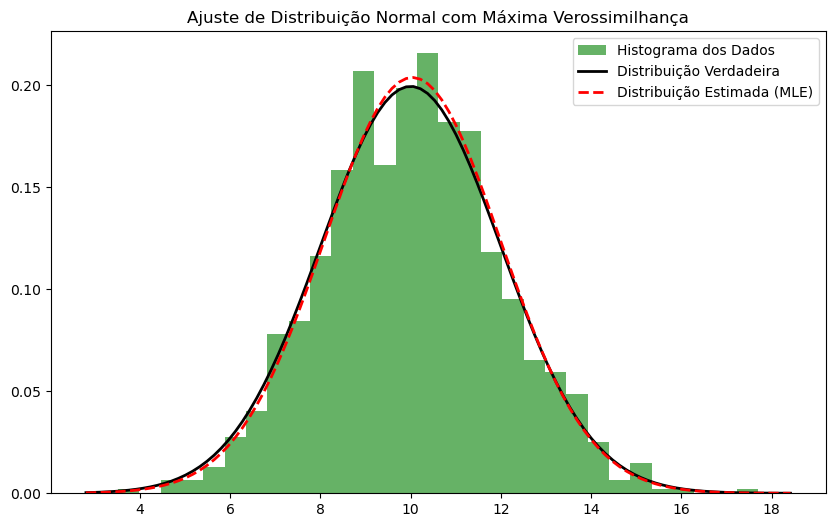

In [4]:
# 3. Visualizar os resultados
plt.figure(figsize=(10, 6))
plt.hist(dados, bins=30, density=True, alpha=0.6, color='g', label='Histograma dos Dados')

# Plotar a distribuição original (verdadeira)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_true = norm.pdf(x, true_mu, true_sigma)
plt.plot(x, p_true, 'k', linewidth=2, label='Distribuição Verdadeira')

# Plotar a distribuição estimada por MLE
p_estimada = norm.pdf(x, mu_estimado, sigma_estimado)
plt.plot(x, p_estimada, 'r--', linewidth=2, label='Distribuição Estimada (MLE)')

plt.title('Ajuste de Distribuição Normal com Máxima Verossimilhança')
plt.legend()
plt.show()

Como podemos ver, os valores de $\mu$ e $\sigma$ estimados pela MLE são extremamente próximos dos valores reais que usamos para gerar os dados. O gráfico também mostra que a curva estimada (vermelha tracejada) se sobrepõe quase perfeitamente à curva verdadeira (preta).